# Исследовательский проект по НИС «Анализ данных в Python». Часть I

# Команда: Магомед Бекаев, Ольга Шавочкина


## Датасет
https://www.kaggle.com/mylesoneill/world-university-rankings

Нашей командой был выбран набор данных <b> World University Rating </b>, а точнее, <b>Times Higher Education World University Rankings</b> -- "глобальный рейтинг университетов, ежегодно публикуемый журналом Times Higher Education (THE). Рейтинг THE считается одним из наиболее авторитетных международных рейтингов университетов наряду с Academic Ranking of World Universities и QS World University Rankings" (c) wikipedia.

### Описание переменных
world_rank – место университета в мире
university_name – название университета
country – страна университета
teaching – оценка образовательной деятельности, от 0 до 100
international – открытость к другим странам, от 0 до 100
research – исследовательская деятельность, от 0 до 100
citations – упоминания, цитирования университета, от 0 до 100
income – доход, от 0 до 100, 218 отсутствующих значений
total_score – общая оценка университета, от 0 до 100, 1402 отсутствующих значения
num_students – число студентов, 59 отсутствующих значений
student_staff_ratio – число сотрудников*100/число студентов, 59 отсутствующих значений
international_students – процент заграничных студентов, 67 отсутствующих значений
female_male_ratio – запись вида “a:b” такая, что a + b = 100, 233 отсутствующих значений
year – дата сбора данных 

Категориальные переменные, номинальные: university_name, country

Количественные переменные, дискретные: teaching, international, research, citations, income, total_score, international_students, student_staff_ratio, female_male_ratio

Количественные переменные, непрерывные: num_students, year

In [248]:
import pandas as pd
df = pd.read_csv("timesData.csv", thousands=',')

In [249]:
import matplotlib.pyplot as plt

In [250]:
df.head(5)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27%,45 : 55,2011


Размер датафрейма

In [170]:
df.shape

(2603, 14)

Названия переменных, количество ненулевых значений, тип данных

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memor

С помощью value_counts() было замечено, что в некоторых столбцах отсутствующие данные были заменены прочерком.

In [172]:
df['income'].value_counts()

-        218
100.0     68
28.0      26
31.1      20
28.8      19
        ... 
52.2       1
66.5       1
46.9       1
72.7       1
60.9       1
Name: income, Length: 613, dtype: int64

In [173]:
df['total_score'].value_counts()

-       1402
49.0      13
51.1      12
46.6      11
50.1      10
        ... 
65.5       1
72.6       1
68.9       1
42.4       1
87.0       1
Name: total_score, Length: 415, dtype: int64

## Преобразования датасета

Для того чтобы нам было удобно работать с данными постараемся по-максимуму преобразовать столбцы-object в столбцы-float

In [253]:
def rank_to_int(s):
    s = str(s) # на случай если мы запустим код еще раз, чтобы не выдало ошибку
    if '-' in s:
        new = s.split('-')
        return new[1]
    if '=' in s:
        return s[1:]
    return s

def delete_percents(s):
    s = str(s)
    if s == 'nan':
        return ''
    if '%' in s:
        return s[:len(s) - 1]
    return s

def ratio_to_percents(s):
    s = str(s)
    if ':' in s:
        new = s.split(' : ')
        if int(new[1]) == 0: 
            return -1
        if int(new[0]) == 0: 
            return -1
        return 100 * int(new[0])/int(new[1]) 
    return s

# преобразовали object в int-ы: промежутки оформили как наибольшее из значений, а равные значения указали без знаков равно
df['world_rank'] = df['world_rank'].apply(rank_to_int)
df['world_rank'] =  pd.to_numeric(df['world_rank'], errors='coerce')

df['international'] = pd.to_numeric(df['international'], errors='coerce')

df['income'] = pd.to_numeric(df['income'], errors='coerce')

df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')

df['num_students'] = pd.to_numeric(df['num_students'], errors='coerce')

df['international_students'] = df['international_students'].apply(delete_percents)
df['international_students'] =  pd.to_numeric(df['international_students'], errors='coerce')

df['female_male_ratio'] = df['female_male_ratio'].apply(ratio_to_percents)
df['female_male_ratio'] = pd.to_numeric(df['female_male_ratio'], errors='coerce')
df = df[df.female_male_ratio != -1]

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2601 non-null   int64  
 1   university_name         2601 non-null   object 
 2   country                 2601 non-null   object 
 3   teaching                2601 non-null   float64
 4   international           2592 non-null   float64
 5   research                2601 non-null   float64
 6   citations               2601 non-null   float64
 7   income                  2383 non-null   float64
 8   total_score             1201 non-null   float64
 9   num_students            2542 non-null   float64
 10  student_staff_ratio     2542 non-null   float64
 11  international_students  2534 non-null   float64
 12  female_male_ratio       2365 non-null   float64
 13  year                    2601 non-null   int64  
dtypes: float64(10), int64(2), object(2)
memo

Наш датасет содержит данные за несколько лет, поэтому для точности исследования выберем только один год.

In [176]:
df = df[df['year'] == 2016]

Создадим новую категориальную переменную, разбив интервальную переменную <b>world_rank</b> на группы <b>top</b>, <b>average</b> and <b>worst</b>


Мы выясним ключевые отличия между университетами, в зависимости от их расположения в рейтинге. Лучшими мы считаем университеты, которые имеют номер в мире до 0.2 * максимальный-номер; средними - от 0.2 * максимальный-номер до 0.8 * максимальный-номер; худшими - от 0.8 * максимальный-номер 

Text(0.5, 1.0, 'Распределение категорий')

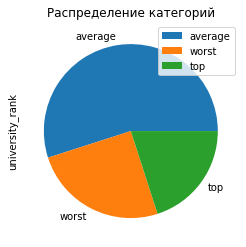

In [189]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df['university_rank'] = df['world_rank']
df['university_rank'] = df['university_rank'].apply(lambda x: 'top' if x <= df['world_rank'].max() * 0.2 else 'worst' if x >= df['world_rank'].max() * 0.8 else 'average')
df['university_rank'].value_counts().plot(kind="pie")
ax.legend(['average', 'worst', 'top'])
plt.title('Распределение категорий')

График демонстрирует как распределились университеты между категориями

## Исследование

Задачи: 
1. Выявить схожести и различия между университетами, расположенными в разных частях рейтинга.
2. Выявить связь рейтинга с локацией университетов.

Гипотезы, которые мы проверим:  
1. В топовых университетах в среднем меньше студентов, чем в остальных.
2. Самый большой доход у топовых университетов.
3. Соотношение количества женщин и мужчин не связано с категорией университета.
4. Больше всего крутых университетов в Англии или Америке, то есть, у них наибольший total score.
5. Наибольшее число интернациональных студентов в Германии (по причине бесплатного образования).

### Гипотеза 1

В топовых университетах в среднем меньше студентов, чем в остальных.

Text(0, 0.5, 'Число университетов')

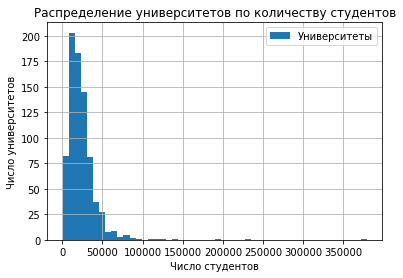

In [54]:
df.num_students.hist(bins=50)
plt.legend(['Университеты'])
plt.title('Распределение университетов по количеству студентов')
plt.xlabel('Число студентов')
plt.ylabel('Число университетов')

В основном до 30 000 студентов

Text(0, 0.5, 'Число университетов')

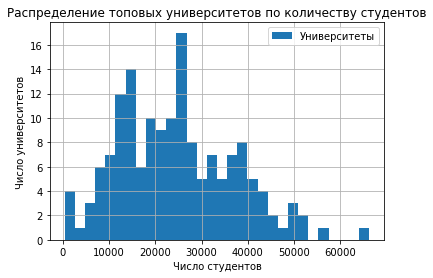

In [63]:
df[df.university_rank=="top"].num_students.hist(bins=30)
plt.y_lim = 10
plt.x_lim = 10
plt.legend(['Университеты'])
plt.title('Распределение топовых университетов по количеству студентов')
plt.xlabel('Число студентов')
plt.ylabel('Число университетов')

В основном до 50 000 студентов.

Text(0, 0.5, 'Число университетов')

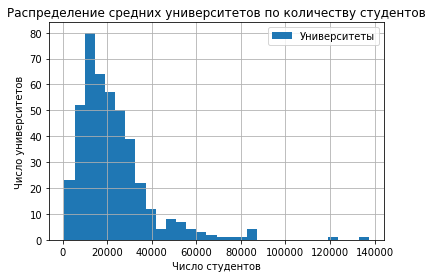

In [64]:
df[df.university_rank=="average"].num_students.hist(bins=30)
plt.y_lim = 10
plt.x_lim = 10
plt.legend(['Университеты'])
plt.title('Распределение средних университетов по количеству студентов')
plt.xlabel('Число студентов')
plt.ylabel('Число университетов')

В основном до 40 000 студентов.

Text(0, 0.5, 'Число университетов')

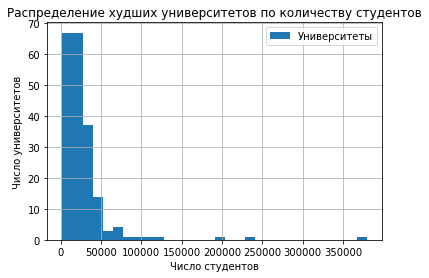

In [66]:
df[df.university_rank=="worst"].num_students.hist(bins=30)
plt.y_lim = 10
plt.x_lim = 10
plt.legend(['Университеты'])
plt.title('Распределение худших университетов по количеству студентов')
plt.xlabel('Число студентов')
plt.ylabel('Число университетов')

В основном до 50000 студентов.

На вид сильных различий в числе студентов не обнаружено.

In [57]:
df.groupby('university_rank')['num_students'].mean()

university_rank
average    22371.616972
top        24649.810127
worst      27694.412060
Name: num_students, dtype: float64

Гипотеза не подтверждена, в ходе исследования было выявлено отсутствие связи между местом университета в рейтинге и числом студентов.

### Гипотеза 2

Самый большой доход у топовых университетов.

Создаем срез датафрейма по столбцам <b>world_rank</b>, <b>university_rank</b>, <b>university_name</b>, <b>income</b>

Сортируем по убыванию <b>income</b> и <b>world_rank</b> по возрастанию

In [70]:
new_df = df[['world_rank', 'university_rank', 'university_name', 'income']]
new_df = new_df.sort_values(by=['income','world_rank'], ascending=[False, True])
new_df = new_df.dropna()
new_df.head(20)

,world_rank,university_rank,university_name,income
1813,11,top,Johns Hopkins University,100.0
1822,20,top,Duke University,100.0
1831,29,top,LMU Munich,100.0
1837,35,top,KU Leuven,100.0
1844,42,top,Peking University,100.0
1849,47,top,Tsinghua University,100.0
1850,47,top,Wageningen University and Research Center,100.0
1867,65,top,Delft University of Technology,100.0
1886,84,top,University of Freiburg,100.0
1919,116,top,Pohang University of Science and Technology,100.0


In [71]:
new_df.T

,1813,1822,1831,1837,1844,1849,1850,1867,1886,1919,...,2451,2459,2479,2486,2509,2512,2523,2531,2536,2571
world_rank,11,20,29,35,42,47,47,65,84,116,...,800,800,800,800,800,800,800,800,800,800
university_rank,top,top,top,top,top,top,top,top,top,top,...,worst,worst,worst,worst,worst,worst,worst,worst,worst,worst
university_name,Johns Hopkins University,Duke University,LMU Munich,KU Leuven,Peking University,Tsinghua University,Wageningen University and Research Center,Delft University of Technology,University of Freiburg,Pohang University of Science and Technology,...,Comenius University in Bratislava,University of Electronic Science and Technolog...,University of Huddersfield,Jagiellonian University,Moscow Institute of Physics and Technology,University of Nairobi,Northwestern Polytechnical University,University of Paris North – Paris 13,Pontifical Catholic University of Paraná,Taras Shevchenko National University of Kyiv
income,100,100,100,100,100,100,100,100,100,100,...,28,28,28,28,28,28,28,28,28,28


Транспонировали и видим, что, кажется, наша гипотеза подтверждается: у наиболее доходных вузов категория <b>top</b>, а у наименее - <b>worst</b>

In [97]:
print("Средний income: " + str(new_df['income'].mean()))

Средний income: 46.86959370904325


Text(0.5, 1, 'Распределение дохода')

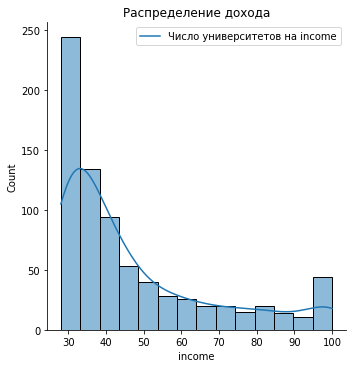

In [100]:
import seaborn as sns  
sns.displot(new_df['income'].dropna(), kde=True)
plt.legend(['Число университетов на income'])
plt.title('Распределение дохода')

Логично, что если наша гипотеза верна, то место университета в мире обратно пропорционально доходу.

In [86]:
new_df['world_rank'].corr(new_df['income'])

-0.31090488597834615

Число отрицательное - это хорошо, но то, что оно 0.3 немного смущает, поэтому построим графики для каждой категории.

Text(0, 0.5, 'Число университетов')

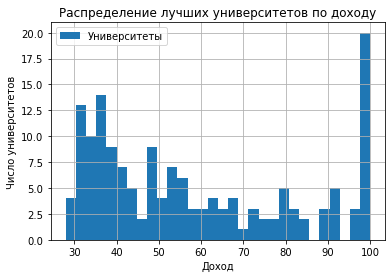

In [101]:
new_df[new_df.university_rank=="top"].income.hist(bins=30)
plt.legend(['Университеты'])
plt.title('Распределение лучших университетов по доходу')
plt.xlabel('Доход')
plt.ylabel('Число университетов')

Text(0, 0.5, 'Число университетов')

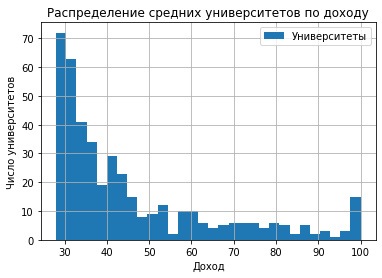

In [102]:
new_df[new_df.university_rank=="average"].income.hist(bins=30)
plt.legend(['Университеты'])
plt.title('Распределение средних университетов по доходу')
plt.xlabel('Доход')
plt.ylabel('Число университетов')

Text(0, 0.5, 'Число университетов')

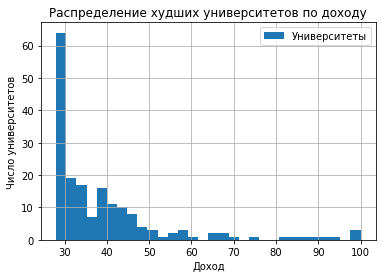

In [103]:
new_df[new_df.university_rank=="worst"].income.hist(bins=30)
plt.legend(['Университеты'])
plt.title('Распределение худших университетов по доходу')
plt.xlabel('Доход')
plt.ylabel('Число университетов')

Text(0, 0.5, 'Число университетов')

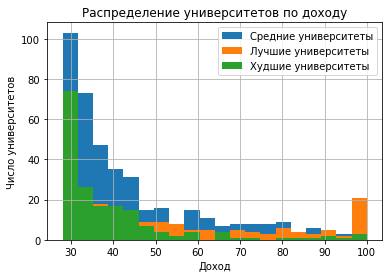

In [106]:
df.groupby('university_rank')['income'].hist(bins=20)
plt.legend(['Средние университеты', 'Лучшие университеты', 'Худшие университеты'])
plt.title('Распределение университетов по доходу')
plt.xlabel('Доход')
plt.ylabel('Число университетов')

Наша гипотеза оказалась верна.

### Гипотеза 3

Соотношение женщин и мужчин не связано с категорией университета.

In [112]:
df['world_rank'].corr(df['female_male_ratio'])

0.007782859939788572

Метод corr сразу нам подсказывает, что мы правы.

In [238]:
pd.pivot_table(df, 
               values='female_male_ratio', 
               index=['university_rank'],
               aggfunc=np.mean)

,female_male_ratio
university_rank,
average,111.594178
top,105.903084
worst,102.620313


И рассмотрим подробнее описательную статистику.

In [193]:
df.groupby('university_rank').female_male_ratio.describe()

,count,mean,std,min,25%,50%,75%,max
university_rank,,,,,,,,
average,409.0,111.594178,47.242806,13.636364,85.185185,112.765957,138.095238,354.545455
top,144.0,105.903084,34.435731,21.951220,92.307692,108.333333,123.484848,233.333333
worst,182.0,102.620313,54.819350,1.010101,61.951348,92.307692,127.272727,354.545455


Вывод: прямая связь между соотношением чисел женщин и мужчин и местом университета в рейтинге не обнаружена, категория average немного выбивается, но скорее всего дело в том, что в нее попало больше всего записей.

### Гипотеза 4

Предположим, что больше всего университетов с большим total_score в Англии или Америке. Для того чтобы это проверить посмотрим какие страны в сумме обладают наибольшим значением.

In [236]:
import numpy as np
new_df = df.dropna()
pd.pivot_table(new_df, 
               values='total_score', 
               index=['country'],
               aggfunc=np.sum)

,total_score
country,
Australia,513.9
Austria,54.2
Belgium,232.1
Canada,368.7
China,70.0
Denmark,169.8
Finland,61.9
France,232.8
Germany,1049.9


Гипотеза верна: наибольший total_score у Америки, на втором месте Англия, на третьем Германия

### Гипотеза 5

Наибольшее число интернациональных студентов в Германии (по причине бесплатного образования).

In [244]:
new_df = pd.pivot_table(df, 
               values='international_students', 
               index=['country'],
               aggfunc=np.sum)
new_df = new_df.sort_values(by=['international_students'], ascending=[False])
new_df

,international_students
country,
United Kingdom,2076.0
United States of America,1778.0
Australia,791.0
Germany,471.0
France,466.0
...,...
Morocco,1.0
Kenya,1.0
Unisted States of America,0.0


Германия вошла в топ-5, но, видимо, не дотянула по причине меньшего количества университетов.

### Итоги

Университеты имеют разное число студентов, вне зависимости от их позиции в рейтинге. Доход университета имеет связь с его положением при ранжировании. Соотношение числа мужчин и женщин в университетах не имеет связи с его уровнем. Наиболее успешными в плане образования оказались Америка и Великобритания, у них же и оказалось больше всего заграничных студентов.

# Part 2. Web-Scraping

##  Цель
https://www.cian.ru/novostroyki-2020/ 
На ЦИАН присутствует огромное количество различных жилых комплексов, информация о которых может использоваться в различных исследованиях. Необходимо собрать информацию о цене, количестве продаваемых квартир с разным количеством комнат, ближайшем метро и названии комплексов.



Импортируем библиотеки и напишем функцию для получения ссылок на страницы комплексов с общей страницы.

In [3]:
import requests
from bs4 import BeautifulSoup

def GetLinks(strInp): #Функция получает на вход ссылку на страницу со списком различных жилых комплексов
    r = requests.get(strInp) 
    page = BeautifulSoup(r.text, 'html.parser')
    #Преобразуем страницу в суп и проитерируемся по объектом с тэгом "a"
    URLarr = []
    for link in page('a'):
        try:
            for sp in link('span'): 
                #Ниже мы проверяем атрибут 'Class' одно из его значений свойственно ссылкам ведущим на страницы комплексов
                if (sp['class'])==['_0fce717cdb--element--GQpBh', '_0fce717cdb--element-color--blue--r6UnU', '_0fce717cdb--element-display--inline--BjFcx', '_0fce717cdb--element-font_weight--bold--yY147', '_0fce717cdb--element-word_wrap--normal--mj6rU', '_0fce717cdb--element-white_space--normal--vpvNM', '_0fce717cdb--element-font_size--18--xuFmC', '_0fce717cdb--element-line_height--22--MjIKo', '_0fce717cdb--element-color_hovered--red--eEisH']:
                    URLarr.append(link['href'])
        except Exception:
            continue
    return(URLarr)

### Пройдемся по страницам поиска и к каждой применим функцию GetLinks(). Получим все ссылки. Выведем только те, которые ведут на жилые комплексы.

In [4]:
finalURL = []
pageIndex = 1;
while (pageIndex)<=20: 
    #Данная ниже ссылка является адаптированной для итерации по страницам поиска жилых комплексов.
    pageLink = "https://www.cian.ru/newobjects/list?deal_type=sale&engine_version=2&offer_type=newobject&region=-1&p="+str(pageIndex)
    finalURL.extend(GetLinks(pageLink))
    pageIndex += 1
print(finalURL)

['https://www.cian.ru/zhiloy-kompleks-victory-park-residences-moskva-2184313/', 'https://www.cian.ru/zhiloy-kompleks-aquatoria-moskva-50400/', 'https://www.cian.ru/zhiloy-kompleks-trikolor-moskva-5226/', 'https://www.cian.ru/zhiloy-kompleks-mfk-oko-moskva-5227/', 'https://www.cian.ru/zhiloy-kompleks-kompoziciya-24-moskva-163607/', 'https://www.cian.ru/zhiloy-kompleks-simvol-moskva-7231/', 'https://www.cian.ru/zhiloy-kompleks-mod-moskva-1895910/', 'https://www.cian.ru/zhiloy-kompleks-poklonnaya-9-moskva-123671/', 'https://www.cian.ru/zhiloy-kompleks-klubnyy-gorod-na-reke-primavera-moskva-3818961/', 'https://www.cian.ru/zhiloy-kompleks-sobytie-moskva-91700/', 'https://www.cian.ru/zhiloy-kompleks-artisan-moskva-90586/', 'https://www.cian.ru/zhiloy-kompleks-turandot-residences-moskva-7789/', 'https://www.cian.ru/zhiloy-kompleks-kompleks-apartamentov-slava-moskva-2052/', 'https://www.cian.ru/zhiloy-kompleks-nice-loft-moskva-3202205/', 'https://www.cian.ru/zhiloy-kompleks-afi-park-voroncovsk

### Пишем код для одной конкретной страницы для получения необходимых данных о ЖК.

In [5]:
#Используем первую ссылку в нашем массиве, для изучения и получения данных.
currentURL = finalURL[0]
currentPage = requests.get(currentURL)
currentSoup = BeautifulSoup(currentPage.text, 'html.parser')

#Словарь для записи полученных данных.
dictInfo = {'Name' : '', 'ClosestStation': '','Class' : '','DateOfConstruction' : '','FloorsNumber' : '','Type' : '','AvgPrice' : '0', 'FullPriceMin' : '', 'FullPriceMax' : '',
            'PricePerMeterMin' : '','PricePerMeterMax' : '', '1rooms': '0', '2rooms': '0', '3rooms': '0', '4rooms': '0', '5rooms': '0', 'Сrooms': '0'}
#Извлекаем название комплекса
nameContainer = currentSoup.find('div', {'data-name' : 'NewbuildingName'})
nameFullString = nameContainer.h1.text
dictInfo['Name'] = nameFullString

#Срок сдачи, класс жилья, этажность, тип дома.
infoArr = currentSoup.find('div', {'class' :'_7a3fb80146--specifications--A93Rj'}).findAll('div', {'class' :'_7a3fb80146--specification--eKsQt'})
dictInfo['DateOfConstruction'] = infoArr[0].div.div.span.text
dictInfo['Class'] = infoArr[1].div.div.span.text
floorsInfo = infoArr[2].div.div.span.text
if (len(floorsInfo.split())==4):
    dictInfo['FloorsNumber'] = floorsInfo.split()[1]+'-'+floorsInfo.split()[3]
else:
    dictInfo['FloorsNumber'] = floorsInfo
dictInfo['Type'] = infoArr[4].div.div.span.text

#Получаем максимаьную и минимальную полную стоимость.
priceContainer = currentSoup.find('div', {'data-name' : 'Price'})
priceFullString = priceContainer.div.span.text.split()
dictInfo['FullPriceMin'] = priceFullString[1]
dictInfo['FullPriceMax'] = priceFullString[5]

#Получаем максимаьную и минимальную стоимость за меип.
pricePerMeterString = priceContainer.find_all('span')[1].text.split()

#Используем if чтобы правильно распарсить строку.
if len(pricePerMeterString) == 9:
    dictInfo['PricePerMeterMin'] = pricePerMeterString[1]+pricePerMeterString[2]
    dictInfo['PricePerMeterMax'] = pricePerMeterString[5]+pricePerMeterString[6]
elif len(pricePerMeterString) == 8:
    dictInfo['PricePerMeterMin'] = pricePerMeterString[1]
    dictInfo['PricePerMeterMax'] = pricePerMeterString[4]+pricePerMeterString[5]
else:
    dictInfo['PricePerMeterMin'] = pricePerMeterString[1]
    dictInfo['PricePerMeterMax'] = pricePerMeterString[4]
    
#Средняя стоимость.    
avgPrice = currentSoup.findAll('div', {'data-name' : 'Summaries'})[0].div.div.span.text.split()[0]
dictInfo['AvgPrice'] = avgPrice

#Ближайшая станция метро
station = currentSoup.find('span', {'class' :"_7a3fb80146--color_black_100--kPHhJ _7a3fb80146--lineHeight_20px--tUURJ _7a3fb80146--fontWeight_normal--P9Ylg _7a3fb80146--fontSize_14px--TCfeJ _7a3fb80146--display_inline--bMJq9 _7a3fb80146--text--g9xAG _7a3fb80146--text_letterSpacing__normal--xbqP6"}).text
dictInfo['ClosestStation'] = station

#Итерируемся по конкретному объекту хранящему данные о разных типах квартир, получая их количество.
offersList = currentSoup.findAll('div', {'data-name' : 'OffersRow'})
for offer in offersList:
    numberOfRooms = offer.div.div.a.h4.text[0]
    numberOfFlats = offer.find('span', {'class' :"_7a3fb80146--color_primary_100--mNATk _7a3fb80146--lineHeight_22px--bnKK9 _7a3fb80146--fontWeight_normal--P9Ylg _7a3fb80146--fontSize_16px--RB9YW _7a3fb80146--display_inline--bMJq9 _7a3fb80146--text--g9xAG _7a3fb80146--text_letterSpacing__normal--xbqP6"}).text[0]
    dictInfo[numberOfRooms+'rooms'] = numberOfFlats
    
#Выведем для проверки информации.
print(dictInfo)

{'Name': 'ЖК «Victory Park Residences (Виктори Парк Резиденсез)» ', 'ClosestStation': 'м. Парк Победы', 'Class': 'Премиум', 'DateOfConstruction': '2023', 'FloorsNumber': '10-11', 'Type': 'Монолитный', 'AvgPrice': '91,3', 'FullPriceMin': '57,47', 'FullPriceMax': '222,06', 'PricePerMeterMin': '739', 'PricePerMeterMax': '1235', '1rooms': '0', '2rooms': '4', '3rooms': '2', '4rooms': '5', '5rooms': '0', 'Сrooms': '0'}


### Создаем функцию для использования кода выше на любой подобный URL.

In [6]:
def CollectInfo(currentURL):
    currentPage = requests.get(currentURL)
    currentSoup = BeautifulSoup(currentPage.text, 'html.parser')
    dictInfo = {'Name' : '', 'ClosestStation': '','Class' : '','DateOfConstruction' : '','FloorsNumber' : '','Type' : '', 'AvgPrice' : 0, 'FullPriceMin' : 0, 'FullPriceMax' : 0,
            'PricePerMeterMin' : 0,'PricePerMeterMax' : 0, '1rooms': 0, '2rooms': 0, '3rooms': 0, '4rooms': 0, '5rooms': 0, 'Сrooms' : 0}
    nameContainer = currentSoup.find('div', {'data-name' : 'NewbuildingName'})
    nameFullString = nameContainer.h1.text
    dictInfo['Name'] = nameFullString

    station = currentSoup.find('span', 
                               {'class' :"_7a3fb80146--color_black_100--kPHhJ _7a3fb80146--lineHeight_20px--tUURJ _7a3fb80146--fontWeight_normal--P9Ylg _7a3fb80146--fontSize_14px--TCfeJ _7a3fb80146--display_inline--bMJq9 _7a3fb80146--text--g9xAG _7a3fb80146--text_letterSpacing__normal--xbqP6"}).text
    dictInfo['ClosestStation'] = station
    
    infoArr = currentSoup.find('div', {'class' :'_7a3fb80146--specifications--A93Rj'}).findAll('div', {'class' :'_7a3fb80146--specification--eKsQt'})
    dictInfo['DateOfConstruction'] = infoArr[0].div.div.span.text
    dictInfo['Class'] = infoArr[1].div.div.span.text
    floorsInfo = infoArr[2].div.div.span.text
    if (len(floorsInfo.split())==4):
        dictInfo['FloorsNumber'] = floorsInfo.split()[1]+'-'+floorsInfo.split()[3]
    else:
        dictInfo['FloorsNumber'] = floorsInfo
    dictInfo['Type'] = infoArr[4].div.div.span.text
    
    avgPrice = currentSoup.findAll('div', {'data-name' : 'Summaries'})[0].div.div.span.text.split()[0]
    dictInfo['AvgPrice'] = avgPrice

    priceContainer = currentSoup.find('div', {'data-name' : 'Price'})
    priceFullString = priceContainer.div.span.text.split()
    dictInfo['FullPriceMin'] = priceFullString[1]
    dictInfo['FullPriceMax'] = priceFullString[5]
    
    pricePerMeterString = priceContainer.find_all('span')[1].text.split()
    if len(pricePerMeterString) == 9:
        dictInfo['PricePerMeterMin'] = pricePerMeterString[1]+pricePerMeterString[2]
        dictInfo['PricePerMeterMax'] = pricePerMeterString[5]+pricePerMeterString[6]
    elif len(pricePerMeterString) == 8:
        dictInfo['PricePerMeterMin'] = pricePerMeterString[1]
        dictInfo['PricePerMeterMax'] = pricePerMeterString[4]+pricePerMeterString[5]
    else:
        dictInfo['PricePerMeterMin'] = pricePerMeterString[1]
        dictInfo['PricePerMeterMax'] = pricePerMeterString[4]

    offersList = currentSoup.findAll('div', {'data-name' : 'OffersRow'})
    for offer in offersList:
        numberOfRooms = offer.div.div.a.h4.text[0]
        numberOfFlats = offer.find('span', 
                                   {'class' :"_7a3fb80146--color_primary_100--mNATk _7a3fb80146--lineHeight_22px--bnKK9 _7a3fb80146--fontWeight_normal--P9Ylg _7a3fb80146--fontSize_16px--RB9YW _7a3fb80146--display_inline--bMJq9 _7a3fb80146--text--g9xAG _7a3fb80146--text_letterSpacing__normal--xbqP6"}).text.split()[0]
        dictInfo[numberOfRooms+'rooms'] = numberOfFlats
    
    return(dictInfo['Name'], dictInfo['ClosestStation'],dictInfo['Class'],
           dictInfo['DateOfConstruction'],dictInfo['FloorsNumber'],dictInfo['Type'], 
           dictInfo['AvgPrice'], dictInfo['FullPriceMin'], dictInfo['FullPriceMax'], dictInfo['PricePerMeterMin'], dictInfo['PricePerMeterMax'], dictInfo['1rooms'], dictInfo['2rooms'], dictInfo['3rooms'], dictInfo['4rooms'], dictInfo['5rooms'], dictInfo['Сrooms'])


### Применим полученную функцию к массиву ссылок, пропуская проблемные данные, отлавливая ошибки.


In [7]:
import pandas as pd
allInfo = []
# Используя массив ссылок полученный в начале, пройдемся по всем ссылкам и с помощью CollectInfo() получим данные.
for url in finalURL:
    try:
        allInfo.append(CollectInfo(url))
    except Exception:
        continue
df = pd.DataFrame(allInfo)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,ЖК «Victory Park Residences (Виктори Парк Рези...,м. Парк Победы,Премиум,2023,10-11,Монолитный,"91,3","57,47","222,06",739,1235,0,41,22,5,0,0
1,ЖК «Aquatoria (Акватория)»,м. Беломорская,Бизнес,2021—2023,11-21,Монолитный,"55,7",21,"138,5",376,656,0,7,7,22,4,0
2,ЖК «Триколор»,м. Ростокино,Бизнес,2015,10-58,"Монолитно-кирпичный, монолитный","32,7","30,52","59,55",200,372,0,49,47,0,0,0
3,ЖК «Композиция №24»,м. Шаболовская,Бизнес,2021,8,Монолитный,"94,9","91,98","99,99",619,627,0,0,0,3,0,0
4,ЖК «Поклонная 9»,м. Парк Победы,Премиум,2023,32,Монолитно-кирпичный,"55,4","38,69","148,26",723,955,0,37,14,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,ЖК «Любовь и Голуби»,м. Селигерская,Комфорт,2020—2022,22,Монолитный,"12,4","6,98","23,42",269,405,29,10,5,0,0,28
187,ЖК «Новое Медведково»,м. Медведково,Комфорт,2015—2023,15-18,"Монолитно-кирпичный, монолитный","9,6","5,77","16,26",154,252,9,53,24,0,0,7
188,ЖК «Rafinad (Рафинад)»,м. Хлебниково,Комфорт,2022,7-8,Монолитный,"10,0","7,12","13,19",149,215,61,216,42,0,0,0
189,ЖК «SELF (Сэлф)»,м. Бульвар Рокоссовского,Комфорт,2024,19-22,"Монолитно-кирпичный, монолитный","15,6","9,09","26,24",247,336,7,7,6,0,0,4


### Установим заголовки DataFrame

In [8]:
df.columns = ['Name', 'ClosestStation', 'Class','DateOfConstruction','FloorsNumber','Type','AvgPrice', 'FullPriceMin', 'FullPriceMax',
            'PricePerMeterMin','PricePerMeterMax', '1room', '2rooms', '3rooms', '4rooms', '5rooms', 'studios']
df

,Name,ClosestStation,Class,DateOfConstruction,FloorsNumber,Type,AvgPrice,FullPriceMin,FullPriceMax,PricePerMeterMin,PricePerMeterMax,1room,2rooms,3rooms,4rooms,5rooms,studios
0,ЖК «Victory Park Residences (Виктори Парк Рези...,м. Парк Победы,Премиум,2023,10-11,Монолитный,"91,3","57,47","222,06",739,1235,0,41,22,5,0,0
1,ЖК «Aquatoria (Акватория)»,м. Беломорская,Бизнес,2021—2023,11-21,Монолитный,"55,7",21,"138,5",376,656,0,7,7,22,4,0
2,ЖК «Триколор»,м. Ростокино,Бизнес,2015,10-58,"Монолитно-кирпичный, монолитный","32,7","30,52","59,55",200,372,0,49,47,0,0,0
3,ЖК «Композиция №24»,м. Шаболовская,Бизнес,2021,8,Монолитный,"94,9","91,98","99,99",619,627,0,0,0,3,0,0
4,ЖК «Поклонная 9»,м. Парк Победы,Премиум,2023,32,Монолитно-кирпичный,"55,4","38,69","148,26",723,955,0,37,14,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,ЖК «Любовь и Голуби»,м. Селигерская,Комфорт,2020—2022,22,Монолитный,"12,4","6,98","23,42",269,405,29,10,5,0,0,28
187,ЖК «Новое Медведково»,м. Медведково,Комфорт,2015—2023,15-18,"Монолитно-кирпичный, монолитный","9,6","5,77","16,26",154,252,9,53,24,0,0,7
188,ЖК «Rafinad (Рафинад)»,м. Хлебниково,Комфорт,2022,7-8,Монолитный,"10,0","7,12","13,19",149,215,61,216,42,0,0,0
189,ЖК «SELF (Сэлф)»,м. Бульвар Рокоссовского,Комфорт,2024,19-22,"Монолитно-кирпичный, монолитный","15,6","9,09","26,24",247,336,7,7,6,0,0,4


### Сохраняем датафрейм в файл.


In [9]:
df.to_excel('apartmentComplexes.xlsx')


Результат сохранен в файл apartmentComplexes.xlsx